# YourCabs Analysis Model selection

### Description
- ### Business problem tackled here is trying to improve customer service for YourCabs.com, a cab company in Bangalore.
- ### The problem of interest is booking cancellations by the company due to unavailability of a car. The challenge is that cancellations can occur very close to the trip start time, thereby causing passengers inconvenience.

### Goal
- ### The goal of the competition is to create a predictive model for classifying new bookings as to whether they will eventually gets cancelled due to car unavailability.

### Importing libraries

In [102]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [103]:
cwd = os.path.dirname(os.getcwd())
data_path_1 = os.path.join(cwd,'data','raw.csv')
ld = pd.read_csv(data_path_1)

### Changing dtypes

In [104]:
# Changing the column dtypes to object
ld[['id','user_id','vehicle_model_id','package_id','travel_type_id','from_area_id','to_area_id',
                                       'from_city_id','to_city_id','online_booking','hour_of_departure',
                                       'mobile_site_booking','from_lat','from_long','to_lat','to_long','season','day_of_departure',
                                       'area_cancel_per','Car_Cancellation']] = ld[['id','user_id','vehicle_model_id','package_id','travel_type_id','from_area_id','to_area_id',
                                       'from_city_id','to_city_id','online_booking','hour_of_departure',
                                       'mobile_site_booking','from_lat','from_long','to_lat','to_long','season','day_of_departure',
                                       'area_cancel_per','Car_Cancellation']].astype('object')

# Changing the date to date column to appropiate data type
ld[['from_date','booking_created']] = ld[['from_date','booking_created']].astype('datetime64[s]')
ld['to_date'] = ld['to_date'].astype('datetime64[s]')

ld['gap_hours'] = ld['gap_hours'].astype('float32')

### Counting number of missing values for each field

In [105]:
ld.isna().sum()

id                         0
user_id                    0
vehicle_model_id           0
package_id             35881
travel_type_id             0
from_area_id              88
to_area_id              9138
from_city_id           27086
to_city_id             41843
from_date                  0
to_date                17890
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  93
from_long                 93
to_lat                  9138
to_long                 9138
Car_Cancellation           0
season                     0
day_of_departure           0
hour_of_departure          0
gap_hours                  0
area_cancel_per            0
dtype: int64

### Checking Value count of Target variable

In [106]:
ld.Car_Cancellation.value_counts(dropna=False)

Car_Cancellation
0    40299
1     3132
Name: count, dtype: int64

### Checking number of unique values of each feature

In [107]:
ld.nunique(dropna=False)

id                     43431
user_id                22267
vehicle_model_id          27
package_id                 8
travel_type_id             3
from_area_id             599
to_area_id               569
from_city_id               4
to_city_id               117
from_date              20377
to_date                22145
online_booking             2
mobile_site_booking        2
booking_created        39349
from_lat                 467
from_long                463
to_lat                   451
to_long                  448
Car_Cancellation           2
season                     4
day_of_departure           7
hour_of_departure          4
gap_hours               7035
area_cancel_per            5
dtype: int64

### Calculating the distance of travel

In [108]:
distance = []
from math import radians, degrees, sin, cos, asin, acos, sqrt

for i in range(ld.shape[0]):
    lon1, lat1, lon2, lat2 = map(radians, [ld['from_long'][i], ld['from_lat'][i], ld['to_long'][i], ld['to_lat'][i]])
    distance.append(6371 * (acos(sin(lat1) * sin(lat2) + cos(lat1) * cos(lat2) * cos(lon1 - lon2))))

In [109]:
ld['distance'] =distance

### Dropping Columns

In [110]:
ld.drop(columns=['id','user_id','to_city_id','from_date','to_date','booking_created','to_lat','to_long','from_lat','from_long'],inplace=True)

In [111]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vehicle_model_id     43431 non-null  object 
 1   package_id           7550 non-null   object 
 2   travel_type_id       43431 non-null  object 
 3   from_area_id         43343 non-null  object 
 4   to_area_id           34293 non-null  object 
 5   from_city_id         16345 non-null  object 
 6   online_booking       43431 non-null  object 
 7   mobile_site_booking  43431 non-null  object 
 8   Car_Cancellation     43431 non-null  object 
 9   season               43431 non-null  object 
 10  day_of_departure     43431 non-null  object 
 11  hour_of_departure    43431 non-null  object 
 12  gap_hours            43431 non-null  float32
 13  area_cancel_per      43431 non-null  object 
 14  distance             34293 non-null  float64
dtypes: float32(1), float64(1), object(13


### Plotting the percentage of occurance of values in each object column

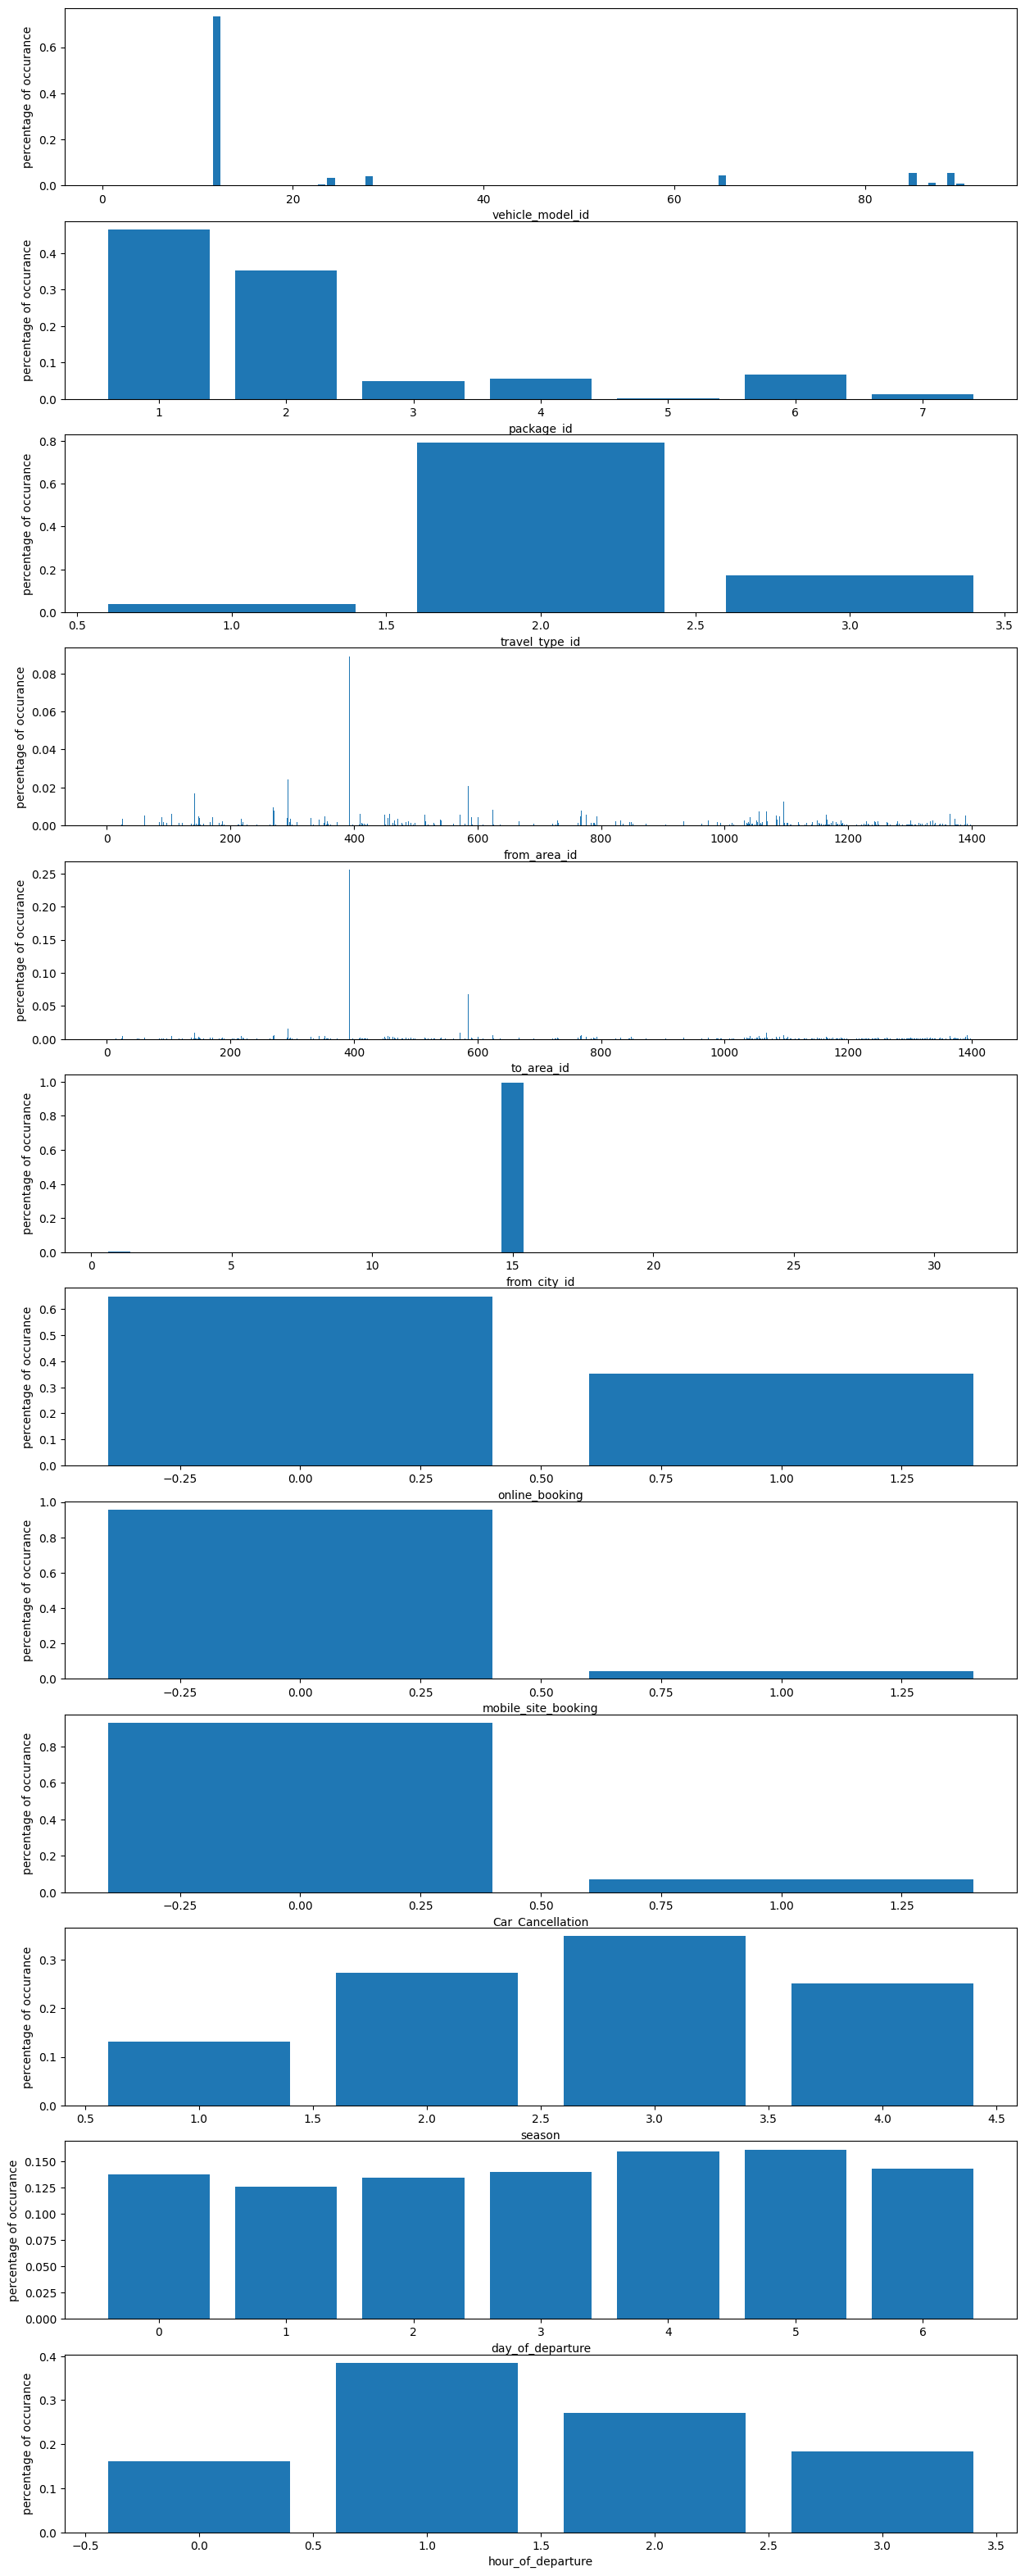

In [114]:
obj_cols = ld.select_dtypes('object').columns

i=0
fig,ax = plt.subplots(12,1)
for i in range(12):
    ax[i].bar(x=ld[obj_cols[i]].value_counts(normalize=True,dropna=True).keys(),height=ld[obj_cols[i]].value_counts(normalize=True,dropna=True).values)
    ax[i].set_xlabel(obj_cols[i])
    ax[i].set_ylabel('percentage of occurance')

    i+=1
    
fig.set_size_inches(15,40)

### Distribution of Numeric columns

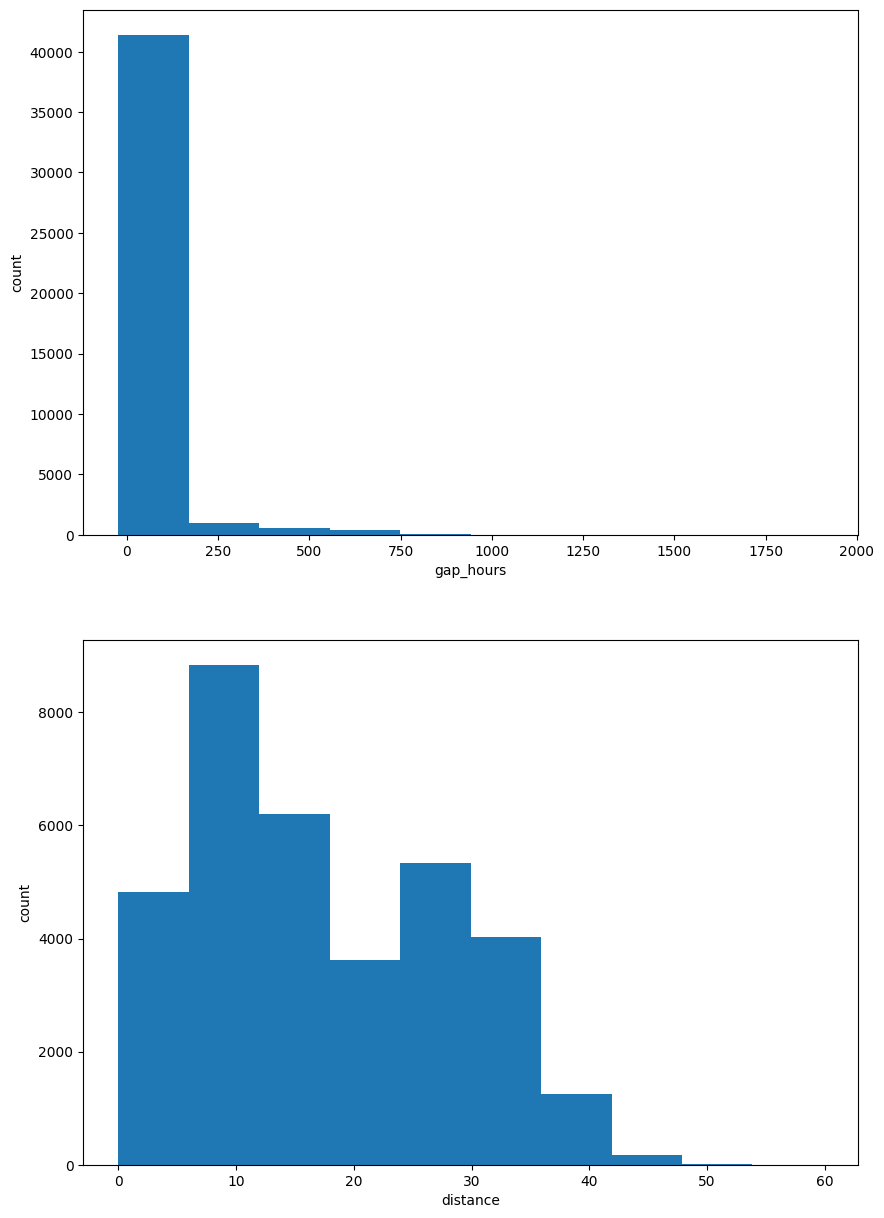

In [62]:
num_cols = ld.select_dtypes('number').columns

i=0
fig,ax = plt.subplots(2,1)
for i in range(2):
    ax[i].hist(x=ld[num_cols[i]])
    ax[i].set_xlabel(num_cols[i])
    ax[i].set_ylabel('count')

    i+=1
fig.set_size_inches(10,15)

### Treating null values

In [63]:
ld.isna().sum()

vehicle_model_id           0
package_id             35881
travel_type_id             0
from_area_id              88
to_area_id              9138
from_city_id           27086
online_booking             0
mobile_site_booking        0
Car_Cancellation           0
season                     0
day_of_departure           0
hour_of_departure          0
gap_hours                  0
area_cancel_per            0
distance                9138
dtype: int64

In [64]:
ld.package_id.fillna('0',inplace=True)
ld.from_area_id.fillna('-1',inplace=True)
ld.to_area_id.fillna('-1',inplace=True)
ld.distance.fillna(-1,inplace=True)


row_1 = ((ld['Car_Cancellation']==1) & (ld['from_city_id'].isna()))
row_0 = ((ld['Car_Cancellation']==0) & (ld['from_city_id'].isna()))

ld.loc[row_1,'from_city_id']=ld.loc[row_1,'from_city_id'].fillna('15.0')
ld.loc[row_0,'from_city_id']=ld.loc[row_0,'from_city_id'].fillna('31.0')


In [65]:
ld= pd.get_dummies(ld,columns=['travel_type_id','area_cancel_per','day_of_departure','hour_of_departure','season'],drop_first=True,dtype=int)

In [66]:
ld.isna().sum()

vehicle_model_id       0
package_id             0
from_area_id           0
to_area_id             0
from_city_id           0
online_booking         0
mobile_site_booking    0
Car_Cancellation       0
gap_hours              0
distance               0
travel_type_id_2       0
travel_type_id_3       0
area_cancel_per_0      0
area_cancel_per_1      0
area_cancel_per_2      0
area_cancel_per_3      0
day_of_departure_1     0
day_of_departure_2     0
day_of_departure_3     0
day_of_departure_4     0
day_of_departure_5     0
day_of_departure_6     0
hour_of_departure_1    0
hour_of_departure_2    0
hour_of_departure_3    0
season_2               0
season_3               0
season_4               0
dtype: int64

### Model Selection

In [67]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report,confusion_matrix

### Train_test_split

In [68]:
X_1=ld.drop(columns='Car_Cancellation')
Y_1 = ld['Car_Cancellation']
Y_1= Y_1.astype('int')

X_train_1 , X_test_1 , Y_train_1, Y_test_1 = train_test_split(X_1,Y_1,random_state=50,test_size=0.33)

### Oversampling

In [69]:
sm = SMOTE(random_state=42)
X_train_over_1,Y_train_over_1 = sm.fit_resample(X=X_train_1,y=Y_train_1)

In [70]:
Y_train_over_1.value_counts()

Car_Cancellation
0    27010
1    27010
Name: count, dtype: int64

### Decision Tree

In [71]:
dt_1 = DecisionTreeClassifier(random_state=42)
param_grid_dt_1 = {'criterion':['gini', 'entropy', 'log_loss'],
                 'splitter':['best', 'random'],
                 'min_samples_split':[2,4,5,6,7,8,9,10,15,20],
                 'max_features':['sqrt', 'log2']
                }

gsv_dt_1 = GridSearchCV(dt_1,param_grid=param_grid_dt_1,scoring='f1',cv=20,n_jobs=-1)

In [72]:
gsv_dt_1.fit(X=X_train_over_1,y=Y_train_over_1)

GridSearchCV(cv=20, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 5, 6, 7, 8, 9, 10, 15, 20],
                         'splitter': ['best', 'random']},
             scoring='f1')

In [73]:
gsv_dt_1.best_params_

{'criterion': 'gini',
 'max_features': 'sqrt',
 'min_samples_split': 7,
 'splitter': 'random'}

In [74]:
ypred_dt_1 = gsv_dt_1.predict(X=X_test_1)

In [75]:
print(classification_report(y_true= Y_test_1 , y_pred=ypred_dt_1))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     13289
           1       0.56      0.53      0.55      1044

    accuracy                           0.94     14333
   macro avg       0.76      0.75      0.76     14333
weighted avg       0.93      0.94      0.93     14333



In [76]:
confusion_matrix(y_true= Y_test_1 , y_pred=ypred_dt_1)

array([[12852,   437],
       [  486,   558]])

### svm

In [77]:
from sklearn.svm import SVC
svc_1 = SVC()
param_grid_svc_1 = {'kernel':['rbf']}

gsv_svc_1 = GridSearchCV(svc_1,param_grid=param_grid_svc_1,scoring='f1',cv=20,n_jobs=-1)

In [78]:
gsv_svc_1.fit(X=X_train_over_1,y=Y_train_over_1)

GridSearchCV(cv=20, estimator=SVC(), n_jobs=-1, param_grid={'kernel': ['rbf']},
             scoring='f1')

In [79]:
ypred_dt_1 = gsv_svc_1.predict(X=X_test_1)

In [80]:
print(classification_report(y_true= Y_test_1 , y_pred=ypred_dt_1))

              precision    recall  f1-score   support

           0       1.00      0.63      0.78     13289
           1       0.18      1.00      0.30      1044

    accuracy                           0.66     14333
   macro avg       0.59      0.82      0.54     14333
weighted avg       0.94      0.66      0.74     14333



In [81]:
confusion_matrix(y_true= Y_test_1 , y_pred=ypred_dt_1)

array([[8429, 4860],
       [   0, 1044]])

### Random Forest

In [82]:
rf_1 =RandomForestClassifier(random_state=40)

In [83]:
param_dist_rf_1 = { 
              'min_samples_split':[2,4,6,8,9,10,20,30],
             'bootstrap':[True,False],
             'max_features':['sqrt','log2',None],
             'criterion':['gini','entropy']}

cv_rf_1 = GridSearchCV(rf_1,cv=10,param_grid=param_dist_rf_1,n_jobs=-1,scoring='f1')

In [85]:
cv_rf_1.fit(X_train_over_1,Y_train_over_1)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=40),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [2, 4, 6, 8, 9, 10, 20, 30]},
             scoring='f1')

In [86]:
cv_rf_1.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_features': 'sqrt',
 'min_samples_split': 4}

In [87]:
ypred_rf_1=cv_rf_1.predict(X_test_1)

In [88]:
print(classification_report(y_true= Y_test_1 , y_pred=ypred_rf_1))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     13289
           1       0.74      0.60      0.66      1044

    accuracy                           0.96     14333
   macro avg       0.86      0.79      0.82     14333
weighted avg       0.95      0.96      0.95     14333



### Voting Classifier

In [94]:
clf1 = DecisionTreeClassifier(criterion='gini',max_features='sqrt',min_samples_split=7,splitter='best',random_state=42)
clf2 = SVC(kernel='rbf',random_state=42)
clf3 = RandomForestClassifier(bootstrap=True,criterion='entropy',max_features='sqrt',min_samples_split=4,random_state=42)

eclf1 = VotingClassifier(estimators=[('dt1', clf1), ('svc1', clf2), ('rf', clf3)], voting='hard')
eclf1.fit(X_train_over_1,Y_train_over_1)

VotingClassifier(estimators=[('dt1',
                              DecisionTreeClassifier(max_features='sqrt',
                                                     min_samples_split=7,
                                                     random_state=42)),
                             ('svc1', SVC(random_state=42)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     min_samples_split=4,
                                                     random_state=42))])

In [95]:
ypred_vote = eclf1.predict(X_test_1)

In [96]:
print(classification_report(y_true= Y_test_1 , y_pred=ypred_vote))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     13289
           1       0.54      0.68      0.60      1044

    accuracy                           0.94     14333
   macro avg       0.76      0.82      0.78     14333
weighted avg       0.94      0.94      0.94     14333



In [97]:
confusion_matrix(y_true= Y_test_1 , y_pred=ypred_vote)

array([[12696,   593],
       [  336,   708]])

In [ ]:
from joblib import Parallel, delayed
import joblib
  
joblib.dump(eclf1, os.path.join(cwd,'models','eclf1.pkl'))
joblib.dump(clf1, os.path.join(cwd,'models','dt1.pkl'))
joblib.dump(clf2, os.path.join(cwd,'models','svc1.pkl'))
joblib.dump(clf3, os.path.join(cwd,'models','rf1.pkl'))